# Berkshire Hathaway Data Analysis

The purpose of this project is to perform Exploratory Data Analysis on the Berkshire Hathaway based off it's performance through its stock history. This analysis is being done through python and the libraries Numpy, Pandas, Matplotlib, and Seaborn.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The dataset for the Berkshire Hathaway stock and its properties were found from Kaggle.com

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [43]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [44]:
# Change this
dataset_url = 'https://www.kaggle.com/kalilurrahman/berkshire-hathaway-stock-latest-and-updated' 

In [45]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./berkshire-hathaway-stock-latest-and-updated" (use force=True to force download)


The dataset has been downloaded and extracted.

In [46]:
# Change this
data_dir = './berkshire-hathaway-stock-latest-and-updated'

In [47]:
import os
os.listdir(data_dir)

['BekshireHathaway_stock_history.csv', 'BekshireHathaway_stock_info.csv']

Let us save and upload our work to Jovian before continuing.

In [48]:
project_name = "berkshire-hathaway-data-analysis-project" 

In [49]:
!pip install jovian --upgrade -q

In [50]:
import jovian

In [51]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kc-ai/berkshire-hathaway-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project


'https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project'

## Data Preparation and Cleaning

The code below imports the pandas library, and creates a data frame from the CSV file that we imported above for the Berkshire Hathaway. It shows the Date, Open, High, Low, Close, Volume, Dividends, and Stock Splits of the Berkshire Hathaway stock. We can analyze the data through the pandas library, and use it to view the 5 lowest closes, highest closes, and analyze how much the stock has grew from March 17th, 1980 to December 1st, 2021. Then, we can make a separate data frame with just the closes, volumes, and open/highs and lows/closes over the years.


In [52]:
import pandas as pd

In [53]:
bh_raw_df = pd.read_csv(data_dir + "/BekshireHathaway_stock_history.csv")

In [54]:
bh_raw_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17,290.0,310.0,290.0,290.0,100,0,0
1,1980-03-18,290.0,290.0,290.0,290.0,0,0,0
2,1980-03-19,290.0,310.0,290.0,290.0,200,0,0
3,1980-03-20,290.0,290.0,290.0,290.0,0,0,0
4,1980-03-21,290.0,290.0,290.0,290.0,0,0,0
...,...,...,...,...,...,...,...,...
10514,2021-11-24,434643.0,437139.0,431497.0,433333.0,15,0,0
10515,2021-11-26,424233.0,429803.0,421091.0,427833.0,16,0,0
10516,2021-11-29,429048.0,432135.0,425000.0,425260.0,19,0,0
10517,2021-11-30,423823.0,426125.0,416546.0,416876.0,19,0,0


In [55]:
bh_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10519 entries, 0 to 10518
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10519 non-null  object 
 1   Open          10519 non-null  float64
 2   High          10519 non-null  float64
 3   Low           10519 non-null  float64
 4   Close         10519 non-null  float64
 5   Volume        10519 non-null  int64  
 6   Dividends     10519 non-null  int64  
 7   Stock Splits  10519 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 657.6+ KB


In [56]:
bh_raw_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10519.000000,10519.000000,10519.000000,10519.000000,10519.000000,10519.0,10519.0
mean,93248.076908,93850.715087,92593.027949,93239.444719,294.987641,0.0,0.0
std,102783.928523,103408.221595,102085.247464,102740.853679,577.277724,0.0,0.0
min,245.000000,245.000000,245.000000,245.000000,0.000000,0.0,0.0
25%,7650.000000,7712.500000,7575.000000,7650.000000,20.000000,0.0,0.0
50%,69000.000000,69500.000000,68500.000000,69000.000000,180.000000,0.0,0.0
75%,124080.000000,124980.000000,123118.500000,124052.500000,400.000000,0.0,0.0
max,441063.000000,445000.000000,439132.000000,439460.000000,27402.000000,0.0,0.0


In [57]:
lowest_bh_closing_df = bh_raw_df.sort_values('Close').head(5)
lowest_bh_closing_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
21,1980-04-16,245.0,245.0,245.0,245.0,0,0,0
20,1980-04-15,255.0,265.0,245.0,245.0,200,0,0
23,1980-04-18,255.0,275.0,255.0,255.0,200,0,0
22,1980-04-17,255.0,275.0,255.0,255.0,100,0,0
19,1980-04-14,260.0,275.0,255.0,255.0,200,0,0


In [16]:
highest_bh_closing_df = bh_raw_df.sort_values('Close', ascending=False).head(5)
highest_bh_closing_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10375,2021-05-10,439132.0,443275.0,439132.0,439460.0,32,0,0
10393,2021-06-04,441063.0,441063.0,437769.0,439016.0,14,0,0
10392,2021-06-03,433050.0,440158.0,433050.0,438745.0,20,0,0
10440,2021-08-11,434655.0,439163.0,434655.0,438160.0,13,0,0
10493,2021-10-26,437165.0,439850.0,435446.0,437890.0,19,0,0


In [17]:
growth = (bh_raw_df['Close'].iloc[10518]/bh_raw_df['Close'].iloc[0])*100


In [18]:
print(growth, "%")

143331.03448275864 %


In [19]:
selected_columns = bh_raw_df[["Date","Close"]]
close_df = selected_columns.copy() 
close_df

,Date,Close
0,1980-03-17,290.0
1,1980-03-18,290.0
2,1980-03-19,290.0
3,1980-03-20,290.0
4,1980-03-21,290.0
...,...,...
10514,2021-11-24,433333.0
10515,2021-11-26,427833.0
10516,2021-11-29,425260.0
10517,2021-11-30,416876.0


In [20]:
bh_raw_df['open-high'] = bh_raw_df['Open']-bh_raw_df['High']
bh_raw_df['open-low'] = bh_raw_df['Open'] - bh_raw_df['Low']
bh_raw_df['close-high'] = bh_raw_df['Close']-bh_raw_df['High']
bh_raw_df['close-low'] = bh_raw_df['Close'] - bh_raw_df['Low']
bh_raw_df['high-low'] = bh_raw_df['High'] - bh_raw_df['Low']
bh_raw_df['open-close'] = bh_raw_df['Open'] - bh_raw_df['Close']
bh_raw_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,open-high,open-low,close-high,close-low,high-low,open-close
0,1980-03-17,290.0,310.0,290.0,290.0,100,0,0,-20.0,0.0,-20.0,0.0,20.0,0.0
1,1980-03-18,290.0,290.0,290.0,290.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980-03-19,290.0,310.0,290.0,290.0,200,0,0,-20.0,0.0,-20.0,0.0,20.0,0.0
3,1980-03-20,290.0,290.0,290.0,290.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1980-03-21,290.0,290.0,290.0,290.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
selected_columns = bh_raw_df[["Date","Volume"]]
volume_df = selected_columns.copy() 
volume_df

,Date,Volume
0,1980-03-17,100
1,1980-03-18,0
2,1980-03-19,200
3,1980-03-20,0
4,1980-03-21,0
...,...,...
10514,2021-11-24,15
10515,2021-11-26,16
10516,2021-11-29,19
10517,2021-11-30,19


In [24]:
bh_raw_df['Date'] = pd.to_datetime(bh_raw_df.Date)



In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kc-ai/berkshire-hathaway-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project


'https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project'

## Exploratory Analysis and Visualization

We will now visualize all of this data that we just analyzed in order to truly comprehend trends and changes within the Berkshire Hathaway stock over its lifetime.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

This is a line graph that represents the growth of the Berkshire Hathaway stock over time, since 1980 to 2021 using the closing price for the day

Text(0.5, 1.0, 'Berkshire Hathaway Growth')

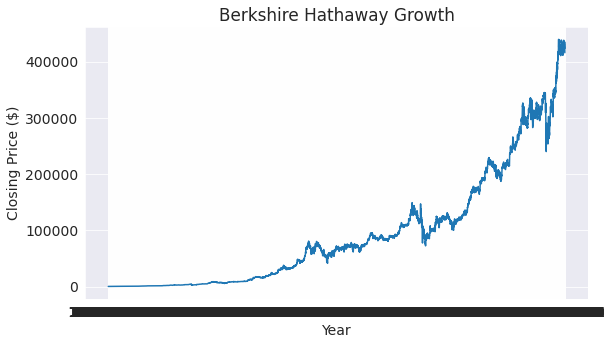

In [33]:
plt.plot(close_df.Date, close_df.Close)
plt.xlabel('Year')
plt.ylabel('Closing Price ($)')
plt.title("Berkshire Hathaway Growth")

This is a bar graph that visualizes the relationship between the High and the Volume of the Berkshire Hathaway Stock

Text(0.5, 1.0, 'Volume vs. High')

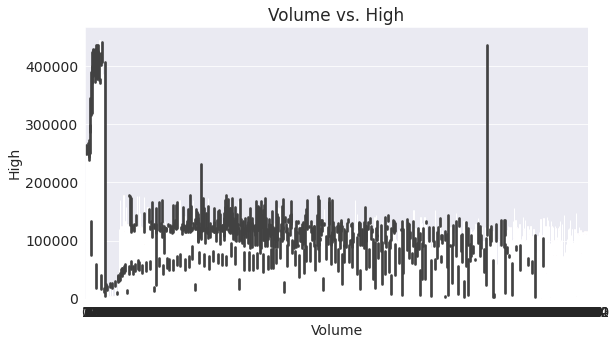

In [32]:
sns.barplot(data=bh_raw_df, x = "Volume", y="High")
plt.xlabel('Volume')
plt.ylabel('High')
plt.title("Volume vs. High")

This is a heat map that shows the relationships between different variables, with the closer the value gets to 1, the higher the correlation, and thus we can make many inferences here.

<AxesSubplot:>

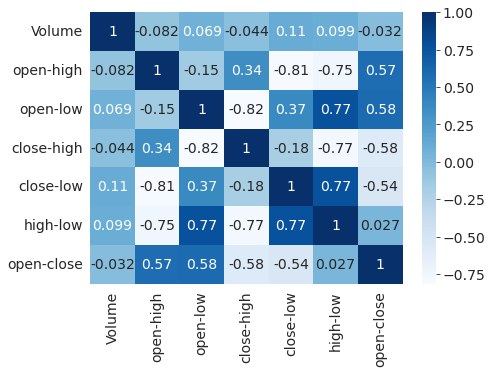

In [31]:

data2 = bh_raw_df.copy()
data2 = data2.drop(['Open','High','Low','Close','Dividends','Stock Splits'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

This is a line chart that shows the relative demand for the Berkshire Hathaway stock by visualizing the trend in the volume over time, since it started.

Text(0.5, 1.0, 'Berkshire Hathaway Demand')

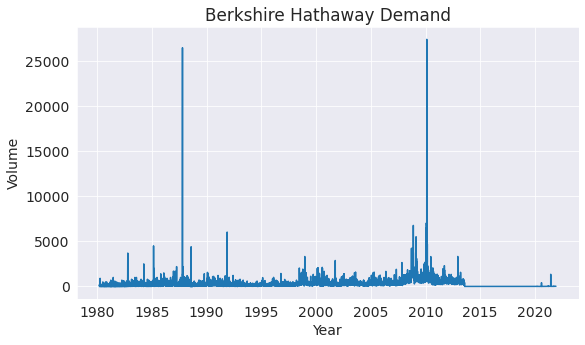

In [30]:
plt.plot(volume_df.Date, volume_df.Volume)
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title("Berkshire Hathaway Demand")

Let us save and upload our work to Jovian before continuing

In [35]:
import jovian

In [36]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kc-ai/berkshire-hathaway-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project


'https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project'

## Asking and Answering Questions

These questions are meant for some analysis, observations, and conclusions based on what we just saw.



#### Q1: What can we tell about the growth of the Berkshire Hathaway Stock? 

The Berkshire Hathaway Stock has grown exponentially over the 40+ years that it has existed, 
going from a minimum of 245 to almost 44,000 dollars.

#### Q2: How did COVID-19 Impact the growth of the Berkshire Hathaway Stock?

The stock was on an upwards trend no matter what, but it dropped almost 10k dollars, and shot right back up around the end of 2020 and beginning of 2021 and reached very high heights to close to 44k dollars.

#### Q3: What did the Volume very heavily correlate with?

As seen in the heatmap, the Volume correlated heavily with the open-low more than any other metric.

#### Q4: When was the demand for the Berkshire Hathaway Stock the greatest?

The demand for the Berkshire Hathaway Stock was greatest around 2010, as well as 1987

#### Q5: What was the correlation between the Volume and the High of the stock?

The amount demanded is obviously much less when the stock is less expensive, but there was an outlier when the volume being bought was very high as well as the price, which was around 40k dollars.

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kc-ai/berkshire-hathaway-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project


'https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project'

## Inferences and Conclusion

Based on all of this analysis, the conclusion can be made that the Berkshire Hathaway stock is extremely valuable and has grown exponentially in the last 40 years, and judging from the rate it has grown as well as many other factors, it will continue to be on this exponentially upward trend for the years to come.

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kc-ai/berkshire-hathaway-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project


'https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project'

## References and Future Work

In the future, deeper analysis with this work could be conducted, and more thorough stock analysis can lead to predictions on what direction this stock will go in.

A resource I found extremely useful was: https://www.analyticsvidhya.com/blog/2021/11/exploratory-data-analysis-on-uber-stocks-dataset/

In [58]:
import jovian

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kc-ai/berkshire-hathaway-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project


'https://jovian.ai/kc-ai/berkshire-hathaway-data-analysis-project'